Machine Learning MiD Assignment

BY:
    Arslan Tariq

Reg:
    DS320192003

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%pylab inline

from subprocess import check_output

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [10]:
df = pd.read_csv("irisdata.csv")

df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

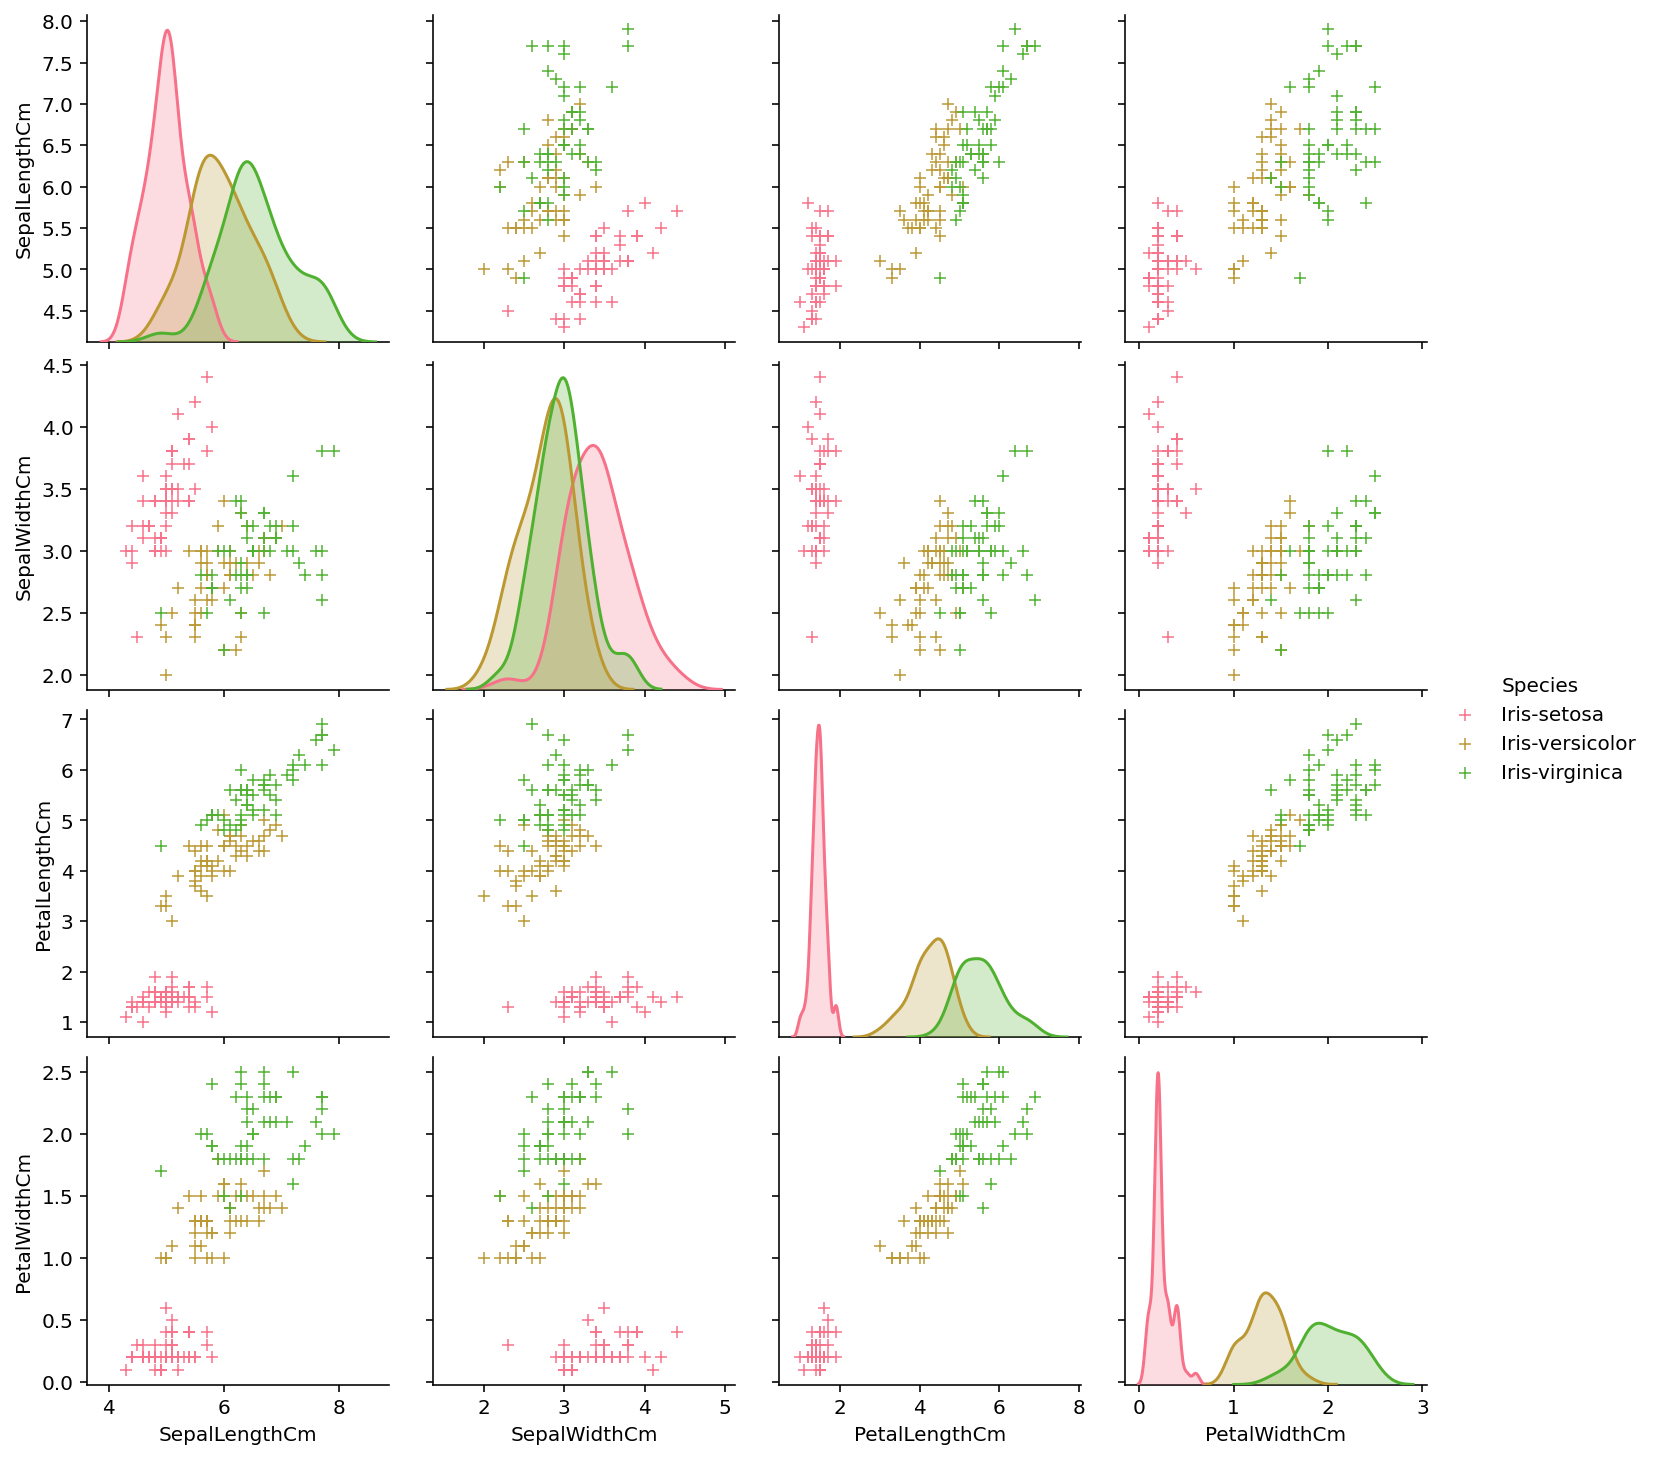

In [17]:
tmp = df.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

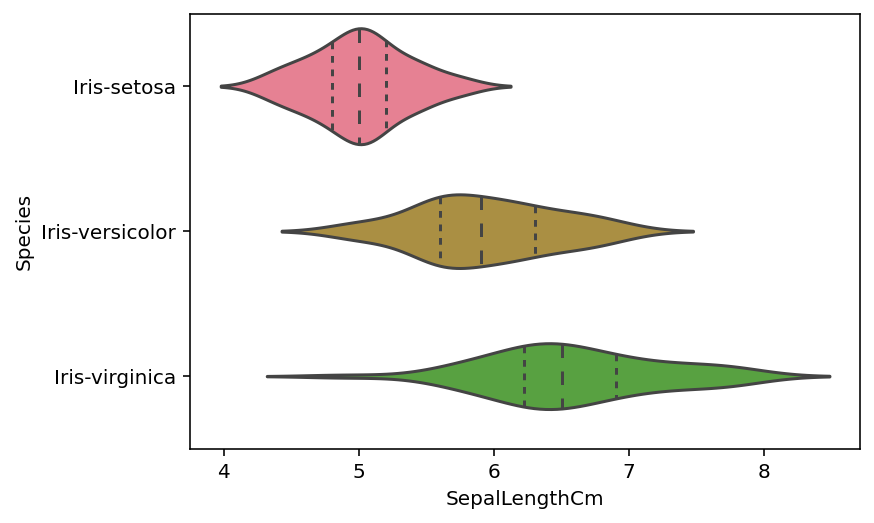

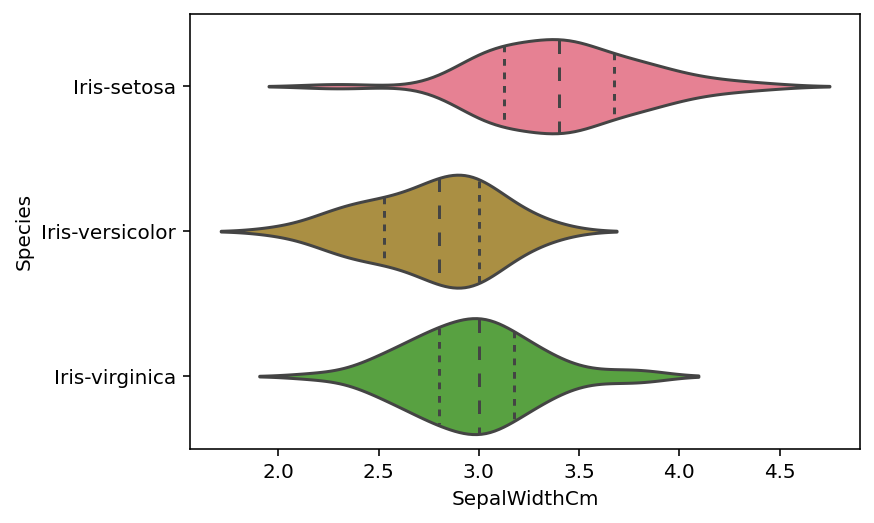

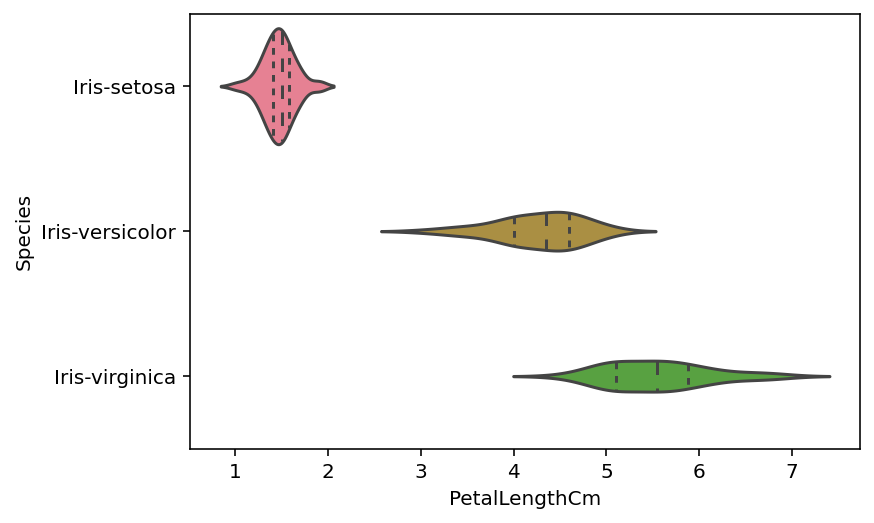

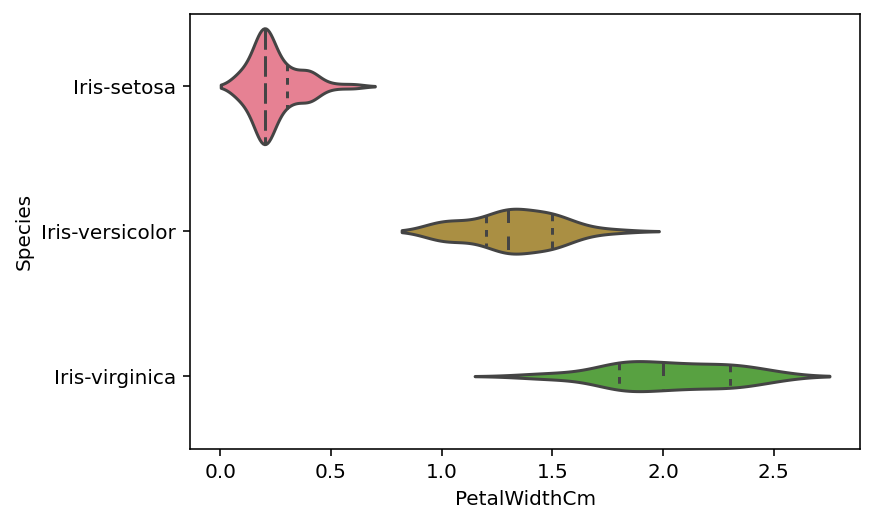

In [21]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

In [22]:
X = df.iloc[:, 1:5]
y = df.iloc[:, 5]

a) Artificial Neural Network

In [33]:
from sklearn.preprocessing import normalize
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.07056264 0.09265065 0.02754646 0.01150299]
 [0.06779548 0.07941484 0.02754646 0.01150299]
 [0.06502832 0.08470916 0.02557886 0.01150299]]


In [35]:
total_length=len(df)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 120 y: 120
Length of test set x: 30 y: 30


In [45]:
train, test = train_test_split(df, test_size = 0.2, stratify = df['Species'], random_state = 42)

In [46]:
X_train = train[['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm','PetalWidthCm']]
y_train = train.Species
X_test = test[['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm','PetalWidthCm']]
y_test = test.Species

In [50]:
anmodel =MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
anmodel.fit(X_train, y_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')

In [52]:
print('Accuracy of ANN on training set: {:.2f}'.format(anmodel.score(X_train, y_train) * 100))
print('Accuracy of ANN on test set: {:.2f}'.format(anmodel.score(X_test, y_test) * 100))

Accuracy of ANN on training set: 99.17
Accuracy of ANN on test set: 96.67


b) Support Vector Machine (SVM)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 105 samples in the training set and 45 samples in the test set


In [26]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [27]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)
print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train_std, y_train)))
print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test_std, y_test)))

The accuracy of the SVM classifier on training data is 0.97
The accuracy of the SVM classifier on test data is 0.98


c) Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier()
random_forest.fit(X_train_std, y_train)


print('The accuracy of the Random Forest classifier on training data is {:.2f}'.format(random_forest.score(X_train_std, y_train)))
print('The accuracy of the Random Forest classifier on test data is {:.2f}'.format(random_forest.score(X_test_std, y_test)))

The accuracy of the Random Forest classifier on training data is 1.00
The accuracy of the Random Forest classifier on test data is 0.98


d) Desicion Tree

In [29]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(X_train_std, y_train)


print('The accuracy of the Decision Tree classifier on training data is {:.2f}'.format(decision_tree.score(X_train_std, y_train)))
print('The accuracy of the Decision Tree classifier on test data is {:.2f}'.format(decision_tree.score(X_test_std, y_test)))

The accuracy of the Decision Tree classifier on training data is 1.00
The accuracy of the Decision Tree classifier on test data is 0.98


e) K Nearest Neighbor (KNN) 

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7, p = 2, metric='minkowski')
knn.fit(X_train_std, y_train)

print('The accuracy of the Knn classifier on training data is {:.2f}'.format(knn.score(X_train_std, y_train)))
print('The accuracy of the Knn classifier on test data is {:.2f}'.format(knn.score(X_test_std, y_test)))

The accuracy of the Knn classifier on training data is 0.97
The accuracy of the Knn classifier on test data is 0.98


__________________________________________________________________________________________________________________________________________________